In [1]:
# installed missing package gensim
!pip install gensim

In [2]:
# import necessary packages
import  matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import re
import string
from sklearn.model_selection import train_test_split
from gensim.test.utils import common_texts
from gensim.models import Word2Vec
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [3]:
# mounted the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# read the csv file using pandas dataframe
fake_news_data = pd.read_csv('/content/fake.csv')
true_news_data = pd.read_csv('/content/true.csv')

**Q1. View the imported csv file data using Pandas Dataframe.**

In [5]:
display(fake_news_data.head())
display(true_news_data.head())

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [6]:
fake_news_data["class"] = 1  # Fake News data → 1
true_news_data["class"] = 0  # True News data → 0

In [7]:
# merged true and fake news datasets
merged_data = [fake_news_data,true_news_data]
df = pd.concat(merged_data,axis=0)

**Q2. drop rows from the dataset consisting null values.**

In [8]:
df = df.dropna()
display(df.shape)

(44898, 5)


**Q3. shuffle the data.**

In [9]:
df = df.sample(frac=1)
display(df.head())

,title,text,subject,date,class
10720,Pentagon to submit plan to Congress for closin...,WASHINGTON (Reuters) - The Pentagon is expecte...,politicsNews,"February 22, 2016",0
3318,Court Just Gave Cops Permission To Murder Dogs,The 6th District Court in Ohio ruled on Monday...,News,"December 21, 2016",1
20775,GAP APOLOGIZES For “Offensive Image” After Bla...,This social media campaign against the GAP is ...,left-news,"Apr 6, 2016",1
4466,Howard Dean Just Doubled Down On Trump’s Poss...,Allow me to begin by saying former DNC chair H...,News,"September 27, 2016",1
13820,FRIGHTENING Observations By A 75 Year Old Amer...,These are shocking revelations that have essen...,politics,"May 26, 2016",1


In [10]:
#reset index of the merged dataframe
df = df.reset_index(drop=True)

In [11]:
# view top 10 rows of processed dataset
df.head(10)

,title,text,subject,date,class
0,Pentagon to submit plan to Congress for closin...,WASHINGTON (Reuters) - The Pentagon is expecte...,politicsNews,"February 22, 2016",0
1,Court Just Gave Cops Permission To Murder Dogs,The 6th District Court in Ohio ruled on Monday...,News,"December 21, 2016",1
2,GAP APOLOGIZES For “Offensive Image” After Bla...,This social media campaign against the GAP is ...,left-news,"Apr 6, 2016",1
3,Howard Dean Just Doubled Down On Trump’s Poss...,Allow me to begin by saying former DNC chair H...,News,"September 27, 2016",1
4,FRIGHTENING Observations By A 75 Year Old Amer...,These are shocking revelations that have essen...,politics,"May 26, 2016",1
5,Ron Howard’s Defense Of Meryl Streep To A Twi...,"By now you have seen, or at least heard about ...",News,"January 9, 2017",1
6,"Yahoo caves in to NSA, FBI – and secretly moni...",21st Century Wire says This will rank as one o...,US_News,"October 5, 2016",1
7,"Yemen Islamist party members arrested, ratchet...",ADEN (Reuters) - Security forces in the southe...,worldnews,"October 11, 2017",0
8,Saudi Arabia suspends any dialogue with Qatar:...,DUBAI (Reuters) - Saudi Arabia on Saturday sus...,worldnews,"September 8, 2017",0
9,HILLARY CLINTON STREET ART APPEARS IN LOS ANGE...,You know those really tacky air fresheners you...,politics,"May 7, 2015",1


**Q4. view the text content of a random data point.**

In [12]:
random_row = df.sample(n=1)
display(random_row)

,title,text,subject,date,class
15507,Hypocrites: Republican National Convention Wi...,As Republicans stand firm about doing nothing ...,News,"June 17, 2016",1


**Data Visualization**

Text(0, 0.5, 'Number of News')

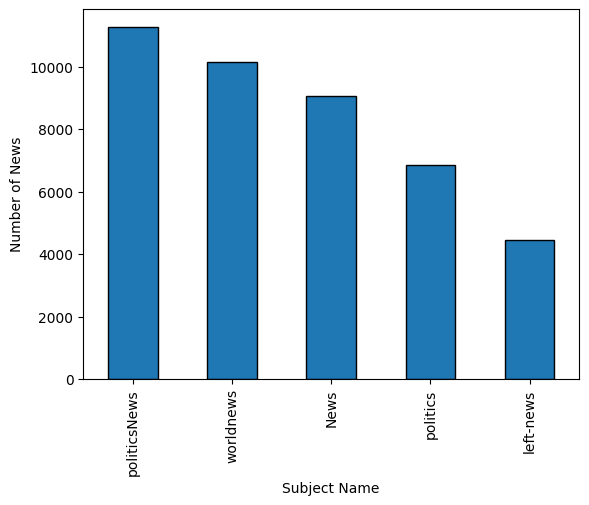

In [13]:
#create a data visualzation of bar/column/line chart of top 5 subjects ->
top_5_subjects = (df['subject'].value_counts()).nlargest(5)
top_5_subjects.plot(kind='bar', edgecolor='black', stacked=True)
plt.xlabel('Subject Name')
plt.ylabel('Number of News')

**Q5. Create a pie chart to find the pecentage of news on different subjects.**

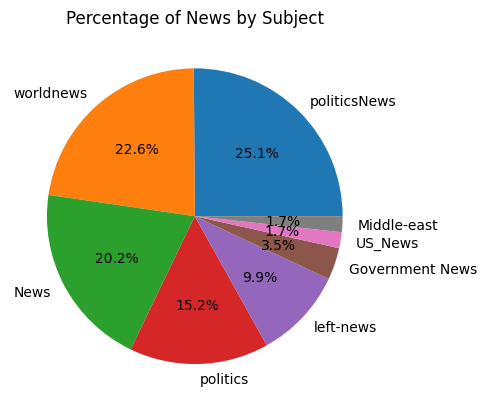

In [14]:
subject_counts = df['subject'].value_counts()
subject_counts.plot(kind='pie', autopct='%1.1f%%', labels=subject_counts.index)
plt.title('Percentage of News by Subject')
plt.ylabel('')
plt.show()

**Text Processing**

In [15]:
# function to remove space,special charecter and convert all text into lower case
def wordopt(text):
  text = text.lower()
  text= re.sub(r'https://\S+|www\.\S+','',text) # remove https:// or www.com
  text = re.sub(r'[^\w]',' ', text) #remove special charecter
  text= re.sub(r'\s+',' ',text) #remove multiple space

  return text

In [16]:
# drop unnecessary columns for classification purpose
df1= df.drop(['title','subject','date'],axis=1)

In [17]:
# apply wordopt method to the whole dataset and view the text content of a random data point
df1['text']=df1['text'].apply(wordopt)
df1['text'][100]

'amman reuters syria demanded on saturday that turkish troops who had entered northwestern syria leave immediately saying their presence constituted a flagrant aggression a foreign ministry statement carried on state media said the entry of turkish military vehicles into rebel held northwest syria through the bab al hawa crossing late on thursday was a violation of international law syria condemns in the strongest terms the incursion of units of the turkish army in idlib province which constitutes a flagrant aggression against the sovereignty and security of syrian territory the statement said turkey says it is operating alongside syrian rebel groups to implement a deal reached last month with russia and iran in the kazakh capital astana to reduce fighting between insurgents but syria s statement said the turkish aggression is not tied in any way with the understandings that were reached between the guarantor states in the astana process but constitutes a violation of these understandi

# **Building Model**

In [18]:
# Separate independent and target columns from the dataset and stored them in x & y variables
x= df1['text']
y= df1['class']


**Q6. Split the dataset into training and testing sets with 25% test size and store them in x_train, x_test, y_train, and y_test.**

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [20]:
# import bbc_news data using url link in json format for training Word2Vec word embedding model
news = pd.read_json('https://query.data.world/s/7c6p2lxb3wjibfsfbp4mwy7p7y4y2d?dws=00000')
news_seg = news['content']
print("Size of Word Dictonary for training Word2Vec: ",news_seg.shape[0])
news_seg.head(2)

Size of Word Dictonary for training Word2Vec:  15825


,content
0,The heroin substitute methadone can be used as...
1,The eldest son of North Korean leader Kim Jong...


In [21]:
# Use head() method on the news DataFrame
display(news.head())

,tags,title,news_post_date,raw_content,content,url,author,language,_id,region,short_description,category,crawled_at
0,,Why quitting heroin substitute methadone is 'v...,2010-08-06T02:46:40.000Z,"<div data-component=""text-block"" class=""ssrcss...",The heroin substitute methadone can be used as...,https://www.bbc.co.uk/news/health-10869329,By Linda Pressly,en_GB,45cbcb62-840b-5a1d-9b59-d7f57f3ab7f6,Health,Heroin substitute methadone is used to wean ad...,BBC News,2021-05-02 17:19:39
1,"North Korea, Kim Jong-un, Kim Jong-il, Kim Jon...",North Korea leader's eldest son 'opposes dynasty',2010-10-12T08:54:42.000Z,"<div data-component=""text-block"" class=""ssrcss...",The eldest son of North Korean leader Kim Jong...,https://www.bbc.co.uk/news/world-asia-pacific-...,,en_GB,771b9c0d-88e1-589f-bf56-8ef80ce161a2,Asia-Pacific,The eldest son of North Korean leader Kim Jong...,BBC News,2021-05-02 17:19:39
2,,Paintings by gangster Reggie Kray go on sale i...,2010-10-27T17:35:24.000Z,"<div data-component=""text-block"" class=""ssrcss...",Seven oil paintings created by notorious gangs...,https://www.bbc.co.uk/news/uk-england-lincolns...,,en_GB,768e3fc6-c406-5570-8328-2e6fb75abd1b,Lincolnshire,A series of oil painting produced by gangster ...,BBC News,2021-05-02 17:19:39
3,,Bracklinn Falls Bridge hauled over gorge by hand,2010-10-08T13:21:50.000Z,"<div data-component=""text-block"" class=""ssrcss...",A 20-tonne bridge is being hauled into place b...,https://www.bbc.co.uk/news/uk-scotland-tayside...,,en_GB,a6e26396-70ec-501c-8ebc-1d600ddf6aab,Tayside and Central Scotland,A 20-tonne bridge is having to be hauled into ...,BBC News,2021-05-02 17:19:39
4,,Manchester soldier's last words become song,2010-09-22T17:35:34.000Z,"<div data-component=""text-block"" class=""ssrcss...",The final words written by a guardsman killed ...,https://www.bbc.co.uk/news/uk-england-manchest...,,en_GB,e8a150a5-b6e0-5315-9c04-fc639dee196f,Manchester,The final words written by a guardsman from Ma...,BBC News,2021-05-02 17:19:39


In [22]:
# apply wordopt function for text processing
news_seg=news_seg.apply(wordopt)
sentences = [sentence.split() for sentence in news_seg ]
w2v_model = Word2Vec(sentences,  window=5, min_count=5, workers=4)

In [23]:
# function to convert a sentence into vector form
def vectorize(sentence):
    words = sentence.split()
    words_vecs = [w2v_model.wv[word] for word in words if word in w2v_model.wv]
    if len(words_vecs) == 0:
        return np.zeros(100)
    words_vecs = np.array(words_vecs)
    return words_vecs.mean(axis=0)

In [24]:
# convert train and test dataset into vector form
xv_train = np.array([vectorize(sentence) for sentence in x_train])
xv_test = np.array([vectorize(sentence) for sentence in x_test])


# **Logistic Regression**

In [25]:
# Trains a Logistic Regression model using vector formed trained data ->
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(xv_train,y_train)

LogisticRegression()

In [26]:
# detect the class(fake or true) on test data and evaluates its accuracy on test set
y_pred = logistic_model.predict(xv_test)
print("Prediction on test data: ",y_pred)
print("Accuracy Score on Test Data: ",logistic_model.score(xv_test,y_test))

Prediction on test data:  [0 0 1 ... 0 1 1]
Accuracy Score on Test Data:  0.9416481069042316


**Accuracy Checking**

In [27]:
# Check Precision, Recall, F1 Score of the logistic model ->
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))

Accuracy: 0.9416481069042316
Precision: 0.9480117059734894
Recall: 0.9397610921501707
F1 score: 0.9438683691833062


In [28]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      5365
           1       0.95      0.94      0.94      5860

    accuracy                           0.94     11225
   macro avg       0.94      0.94      0.94     11225
weighted avg       0.94      0.94      0.94     11225



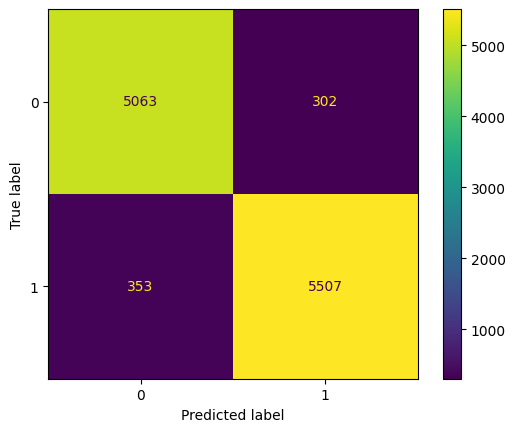

In [29]:
# Check overall accuracy using confusion matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm= confusion_matrix(y_test,y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot()
plt.show()

# **Random Forest Classifier**

### **Model Building and Prediction**

**Q7. Use Random Forest Classifer for this classfication purpose and predict the outcomes for test data.**

In [30]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(xv_train, y_train)

# Predict on the test data
y_pred_rf = rf_model.predict(xv_test)
y_pred_rf
rf_model_score=rf_model.score(xv_test,y_test)
print("Prediction on test data: ",y_pred_rf)
print("Accuracy Score on Test Data: ",rf_model_score)

Prediction on test data:  [0 0 1 ... 0 1 1]
Accuracy Score on Test Data:  0.9428953229398663


### **Accuracy Checking**

**Q8. Find the accuracy, precison, recall, F1 Score of the model while using Random Forest Classsifier and visualize overall accuracy using confusion matrix.**

In [31]:
# Check Precision, Recall, F1 Score of the Random Forest model
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

print('Accuracy:', accuracy_score(y_test, y_pred_rf))
print('Precision:', precision_score(y_test, y_pred_rf))
print('Recall:', recall_score(y_test, y_pred_rf))
print('F1 score:', f1_score(y_test, y_pred_rf))

Accuracy: 0.9428953229398663
Precision: 0.9440190573421814
Recall: 0.9467576791808874
F1 score: 0.9453863849365255


In [32]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      5365
           1       0.94      0.95      0.95      5860

    accuracy                           0.94     11225
   macro avg       0.94      0.94      0.94     11225
weighted avg       0.94      0.94      0.94     11225



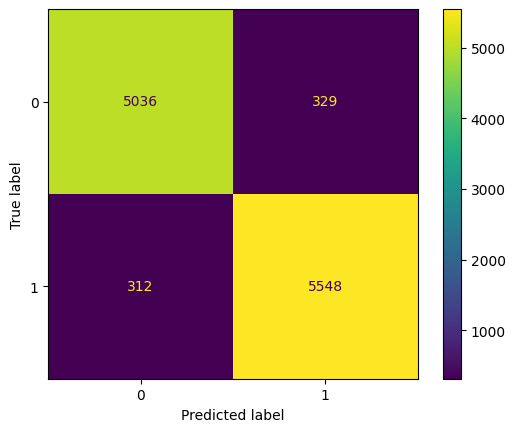

In [33]:
# Check overall accuracy using confusion matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_display_rf = ConfusionMatrixDisplay(confusion_matrix = cm_rf)
cm_display_rf.plot()
plt.show()

# **Save the Model using pickle**

In [34]:
# save the logistic regression model as pickle file
import pickle
import os

save_dir = '/content/drive/MyDrive/colab notebooks'
# Define the full file path for the logistic regression model
filename1 = os.path.join(save_dir, 'logistic_regression_model.pickle')

if not os.path.exists(save_dir):
    os.makedirs(save_dir)
    print(f"Directory '{save_dir}' created.")

# Save the model
pickle.dump(logistic_model, open(filename1, 'wb'))


In [35]:
# Load the pickle file and checkout model score
loaded_model = pickle.load(open(filename1, 'rb'))
result = loaded_model.score(xv_test, y_test)
print(result)

0.9416481069042316


**Q9. Save the trained Random Forest Model as pickle/svg file in your desired repository for further use.**

In [36]:
# Save the Random Forest model as a pickle file
import pickle
import os

save_dir = '/content/drive/MyDrive/colab notebooks'
filename_rf = os.path.join(save_dir, 'random_forest_model.pickle')
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
    print(f"Directory '{save_dir}' created.")

pickle.dump(rf_model, open(filename_rf, 'wb'))

In [37]:
loaded_model = pickle.load(open(filename_rf, 'rb'))
result = loaded_model.score(xv_test, y_test)
print(result)

0.9428953229398663


# **Q10. Load that saved model in another Notebook use it on other dataset for fake news detection.**

In [38]:
# Load the saved Random Forest model
import pickle
loaded_rf_model_path = '/content/drive/MyDrive/colab notebooks/random_forest_model.pickle'
loaded_rf_model = pickle.load(open(loaded_rf_model_path, 'rb'))

# Load the saved Logistic Regression model
import pickle
loaded_lr_model_path = '/content/drive/MyDrive/colab notebooks/logistic_regression_model.pickle' # Replace with the actual path to your saved Logistic Regression model
loaded_lr_model = pickle.load(open(loaded_lr_model_path, 'rb'))

**I was not able to find any other dataset to work on and test the models. So as per Sujoy sir's instructions, I have performed the train-val-test split, shuffled it 5 times to get different parameters each time, and then found out their average to find the final aggregates. The following cells are based on the same.**

In [39]:
def split_data(df):
    """Splits the dataframe into training, validation, and testing sets."""
    train_df, temp_df = train_test_split(df, test_size=0.4, random_state=42)
    val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)  # 0.5 of 40% is 20%
    return train_df, val_df, test_df

train_df, val_df, test_df = split_data(df1)
print("Shape of training data:", train_df.shape)
print("Shape of validation data:", val_df.shape)
print("Shape of testing data:", test_df.shape)

Shape of training data: (26938, 2)
Shape of validation data: (8980, 2)
Shape of testing data: (8980, 2)


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np


# Lists to store additional metrics for LR
lr_val_precisions = []
lr_val_accuracies = []
lr_val_recalls = []
lr_val_f1_scores = []
lr_test_precisions = []
lr_test_accuracies = []
lr_test_recalls = []
lr_test_f1_scores = []

# Lists to store additional metrics for RFC
rf_val_precisions = []
rf_val_accuracies = []
rf_val_recalls = []
rf_val_f1_scores = []
rf_test_precisions = []
rf_test_accuracies = []
rf_test_recalls = []
rf_test_f1_scores = []

n_runs = 5

print(f"Starting {n_runs} runs of train-val-test split, training, and evaluation with Word2Vec...")

for i in range(n_runs):
    print(f"\n--- Run {i+1}/{n_runs} ---")

    # Shuffle the data by sampling with frac=1
    shuffled_df1 = df1.sample(frac=1, random_state=None).reset_index(drop=True)

    # Perform the 60-20-20 split
    train_df, val_df, test_df = split_data(shuffled_df1)


    print("Vectorizing data with Word2Vec...")
    X_train_w2v = np.array([vectorize(sentence) for sentence in train_df['text']])
    X_val_w2v = np.array([vectorize(sentence) for sentence in val_df['text']])
    X_test_w2v = np.array([vectorize(sentence) for sentence in test_df['text']])
    print("Vectorization complete.")

    #Train and Evaluate Logistic Regression Model
    print("Training Logistic Regression...")
    lr_model = LogisticRegression()

    lr_model.fit(X_train_w2v, train_df['class'])

    #Evaluate on validation set and store metrics
    val_pred_lr = lr_model.predict(X_val_w2v)
    lr_val_accuracies.append(accuracy_score(val_df['class'], val_pred_lr))
    lr_val_precisions.append(precision_score(val_df['class'], val_pred_lr, average='weighted'))
    lr_val_recalls.append(recall_score(val_df['class'], val_pred_lr, average='weighted'))
    lr_val_f1_scores.append(f1_score(val_df['class'], val_pred_lr, average='weighted'))
    print(f"LR Val Accuracy: {lr_val_accuracies[-1]:.4f}")

    #Evaluate on test set and store metrics
    test_pred_lr = lr_model.predict(X_test_w2v)
    lr_test_accuracies.append(accuracy_score(test_df['class'], test_pred_lr))
    lr_test_precisions.append(precision_score(test_df['class'], test_pred_lr, average='weighted'))
    lr_test_recalls.append(recall_score(test_df['class'], test_pred_lr, average='weighted'))
    lr_test_f1_scores.append(f1_score(test_df['class'], test_pred_lr, average='weighted'))
    print(f"LR Test Accuracy: {lr_test_accuracies[-1]:.4f}")


    #Train and Evaluate Random Forest Model
    print("Training Random Forest...")
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42) # Using a fixed random_state for RF for consistency across runs

    rf_model.fit(X_train_w2v, train_df['class'])

    #Evaluate on validation set and store metrics
    val_pred_rf = rf_model.predict(X_val_w2v)
    rf_val_accuracies.append(accuracy_score(val_df['class'], val_pred_rf))
    rf_val_precisions.append(precision_score(val_df['class'], val_pred_rf, average='weighted'))
    rf_val_recalls.append(recall_score(val_df['class'], val_pred_rf, average='weighted'))
    rf_val_f1_scores.append(f1_score(val_df['class'], val_pred_rf, average='weighted'))
    print(f"RF Val Accuracy: {rf_val_accuracies[-1]:.4f}")


    #Evaluate on test set and store metrics
    test_pred_rf = rf_model.predict(X_test_w2v)
    rf_test_accuracies.append(accuracy_score(test_df['class'], test_pred_rf))
    rf_test_precisions.append(precision_score(test_df['class'], test_pred_rf, average='weighted'))
    rf_test_recalls.append(recall_score(test_df['class'], test_pred_rf, average='weighted'))
    rf_test_f1_scores.append(f1_score(test_df['class'], test_pred_rf, average='weighted'))
    print(f"RF Test Accuracy: {rf_test_accuracies[-1]:.4f}")


print("\nAll runs complete.")

Starting 5 runs of train-val-test split, training, and evaluation with Word2Vec...

--- Run 1/5 ---
Vectorizing data with Word2Vec...
Vectorization complete.
Training Logistic Regression...
LR Val Accuracy: 0.9392
LR Test Accuracy: 0.9452
Training Random Forest...
RF Val Accuracy: 0.9331
RF Test Accuracy: 0.9322

--- Run 2/5 ---
Vectorizing data with Word2Vec...
Vectorization complete.
Training Logistic Regression...
LR Val Accuracy: 0.9448
LR Test Accuracy: 0.9408
Training Random Forest...
RF Val Accuracy: 0.9359
RF Test Accuracy: 0.9372

--- Run 3/5 ---
Vectorizing data with Word2Vec...
Vectorization complete.
Training Logistic Regression...
LR Val Accuracy: 0.9418
LR Test Accuracy: 0.9409
Training Random Forest...
RF Val Accuracy: 0.9360
RF Test Accuracy: 0.9339

--- Run 4/5 ---
Vectorizing data with Word2Vec...
Vectorization complete.
Training Logistic Regression...
LR Val Accuracy: 0.9413
LR Test Accuracy: 0.9396
Training Random Forest...
RF Val Accuracy: 0.9363
RF Test Accuracy: 

In [41]:
import numpy as np

print("Aggregated Test Metrics (Mean ± Standard Deviation)")

#Aggregate Logistic Regression Test Metrics
lr_test_accuracy_mean = np.mean(lr_test_accuracies)
lr_test_accuracy_std = np.std(lr_test_accuracies)
lr_test_precision_mean = np.mean(lr_test_precisions)
lr_test_precision_std = np.std(lr_test_precisions)
lr_test_recall_mean = np.mean(lr_test_recalls)
lr_test_recall_std = np.std(lr_test_recalls)
lr_test_f1_mean = np.mean(lr_test_f1_scores)
lr_test_f1_std = np.std(lr_test_f1_scores)

print("Logistic Regression:")
print(f"  Accuracy:  {lr_test_accuracy_mean:.4f} ± {lr_test_accuracy_std:.4f}")
print(f"  Precision: {lr_test_precision_mean:.4f} ± {lr_test_precision_std:.4f}")
print(f"  Recall:    {lr_test_recall_mean:.4f} ± {lr_test_recall_std:.4f}")
print(f"  F1 Score:  {lr_test_f1_mean:.4f} ± {lr_test_f1_std:.4f}")

# Aggregate Random Forest Test Metrics
rf_test_accuracy_mean = np.mean(rf_test_accuracies)
rf_test_accuracy_std = np.std(rf_test_accuracies)
rf_test_precision_mean = np.mean(rf_test_precisions)
rf_test_precision_std = np.std(rf_test_precisions)
rf_test_recall_mean = np.mean(rf_test_recalls)
rf_test_recall_std = np.std(rf_test_recalls)
rf_test_f1_mean = np.mean(rf_test_f1_scores)
rf_test_f1_std = np.std(rf_test_f1_scores)

print("Random Forest:")
print(f"  Accuracy:  {rf_test_accuracy_mean:.4f} ± {rf_test_accuracy_std:.4f}")
print(f"  Precision: {rf_test_precision_mean:.4f} ± {rf_test_precision_std:.4f}")
print(f"  Recall:    {rf_test_recall_mean:.4f} ± {rf_test_recall_std:.4f}")
print(f"  F1 Score:  {rf_test_f1_mean:.4f} ± {rf_test_f1_std:.4f}")

print("Aggregation complete.")

Aggregated Test Metrics (Mean ± Standard Deviation)
Logistic Regression:
  Accuracy:  0.9415 ± 0.0019
  Precision: 0.9416 ± 0.0020
  Recall:    0.9415 ± 0.0019
  F1 Score:  0.9415 ± 0.0019
Random Forest:
  Accuracy:  0.9347 ± 0.0017
  Precision: 0.9347 ± 0.0017
  Recall:    0.9347 ± 0.0017
  F1 Score:  0.9347 ± 0.0017
Aggregation complete.


# **Q11**(Optional).

**1. Try to enhance the model's accuracy by using adaboost or any other boosting methods.**
**2. Use TF-IDF or any other vectorizer instead of Word2Vec and study how much it affects on model's accuracy.**

**1.Enhancing model's efficiency**

Gradient Boosting Model Performance:
Accuracy: 0.9510913140311804
Precision: 0.9516924647048818
Recall: 0.9547781569965871
F1 score: 0.95323281369793
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      5365
           1       0.95      0.95      0.95      5860

    accuracy                           0.95     11225
   macro avg       0.95      0.95      0.95     11225
weighted avg       0.95      0.95      0.95     11225

Confusion Matrix:


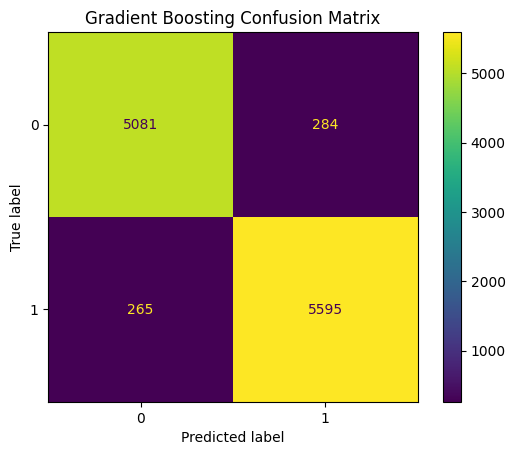

In [42]:
#Using Gradient Boost classifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

gbm_model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.4, max_depth=3)

gbm_model.fit(xv_train, y_train)

# Make predictions on the test data
y_pred_gbm = gbm_model.predict(xv_test)

# Evaluate the performance
print("Gradient Boosting Model Performance:")
print('Accuracy:', accuracy_score(y_test, y_pred_gbm))
print('Precision:', precision_score(y_test, y_pred_gbm))
print('Recall:', recall_score(y_test, y_pred_gbm))
print('F1 score:', f1_score(y_test, y_pred_gbm))

print('Classification Report:')
print(classification_report(y_test, y_pred_gbm))

# Check overall accuracy using confusion matrix
print('Confusion Matrix:')
cm_gbm = confusion_matrix(y_test, y_pred_gbm)
cm_display_gbm = ConfusionMatrixDisplay(confusion_matrix = cm_gbm)
cm_display_gbm.plot()
plt.title('Gradient Boosting Confusion Matrix')
plt.show()

**2.TF-IDF vectorizer**

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000)

#Fit and transform the text data
tfidf_x = tfidf_vectorizer.fit_transform(df1['text'])

#Split the TF-IDF vectorized data into training and testing sets
tfidf_x_train, tfidf_x_test, y_train_tfidf, y_test_tfidf = train_test_split(tfidf_x, df1['class'], test_size=0.25)

print("TF-IDF vectorization complete.")
print("Shape of TF-IDF training data:", tfidf_x_train.shape)
print("Shape of TF-IDF testing data:", tfidf_x_test.shape)

TF-IDF vectorization complete.
Shape of TF-IDF training data: (33673, 5000)
Shape of TF-IDF testing data: (11225, 5000)


**Random forest classifier using TF-IDF**

Random Forest Model Performance with TF-IDF:
Accuracy: 0.9971492204899778
Precision: 0.9974597798475868
Recall: 0.9971220585745726
F1 score: 0.9972908906197088
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5318
           1       1.00      1.00      1.00      5907

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225

Confusion Matrix:


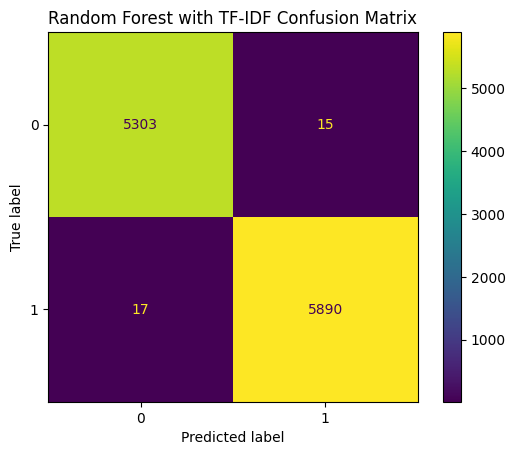

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize the Random Forest Classifier
rf_model_tfidf = RandomForestClassifier()

# Train the Random Forest model using TF-IDF training data
rf_model_tfidf.fit(tfidf_x_train, y_train_tfidf)

# Make predictions on the TF-IDF test data
y_pred_rf_tfidf = rf_model_tfidf.predict(tfidf_x_test)

# Evaluate the performance
print("Random Forest Model Performance with TF-IDF:")
print('Accuracy:', accuracy_score(y_test_tfidf, y_pred_rf_tfidf))
print('Precision:', precision_score(y_test_tfidf, y_pred_rf_tfidf))
print('Recall:', recall_score(y_test_tfidf, y_pred_rf_tfidf))
print('F1 score:', f1_score(y_test_tfidf, y_pred_rf_tfidf))

print('Classification Report:')
print(classification_report(y_test_tfidf, y_pred_rf_tfidf))

# Check overall accuracy using confusion matrix
print('Confusion Matrix:')
cm_rf_tfidf = confusion_matrix(y_test_tfidf, y_pred_rf_tfidf)
cm_display_rf_tfidf = ConfusionMatrixDisplay(confusion_matrix = cm_rf_tfidf)
cm_display_rf_tfidf.plot()
plt.title('Random Forest with TF-IDF Confusion Matrix')
plt.show()

**Logistic regression using TF-IDF**

Logistic Regression Model Performance with TF-IDF:
Accuracy: 0.9882405345211581
Precision: 0.9899881215000849
Recall: 0.9876417809378704
F1 score: 0.9888135593220339
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5318
           1       0.99      0.99      0.99      5907

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225

Confusion Matrix:


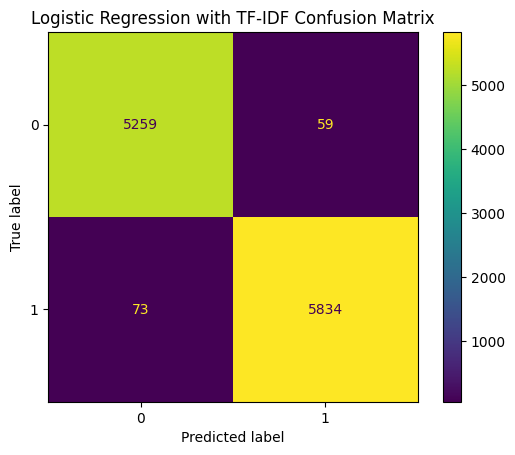

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize the Logistic Regression model
logistic_model_tfidf = LogisticRegression()

# Train the Logistic Regression model using TF-IDF training data
logistic_model_tfidf.fit(tfidf_x_train, y_train_tfidf)

# Make predictions on the TF-IDF test data
y_pred_lr_tfidf = logistic_model_tfidf.predict(tfidf_x_test)

# Evaluate the performance
print("Logistic Regression Model Performance with TF-IDF:")
print('Accuracy:', accuracy_score(y_test_tfidf, y_pred_lr_tfidf))
print('Precision:', precision_score(y_test_tfidf, y_pred_lr_tfidf))
print('Recall:', recall_score(y_test_tfidf, y_pred_lr_tfidf))
print('F1 score:', f1_score(y_test_tfidf, y_pred_lr_tfidf))

print('Classification Report:')
print(classification_report(y_test_tfidf, y_pred_lr_tfidf))

# Check overall accuracy using confusion matrix
print('Confusion Matrix:')
cm_lr_tfidf = confusion_matrix(y_test_tfidf, y_pred_lr_tfidf)
cm_display_lr_tfidf = ConfusionMatrixDisplay(confusion_matrix = cm_lr_tfidf)
cm_display_lr_tfidf.plot()
plt.title('Logistic Regression with TF-IDF Confusion Matrix')
plt.show()